In [9]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sciml.data.preprocessing.process_given_dataset import get_mu_xs_sol

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
d_p = 50
d_V = 40
epochs = 100 

In [11]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(100,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])

In [12]:
folder_path = "/home/janis/SCIML/summerschool/data/benchmarks/given/"

In [13]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="../../data/benchmarks/given/")

2025-08-05 19:52:32,746 - sciml.model.deeponet.deeponet - INFO - Model initialized with 100 epochs, 32 batch size, 0.001 learning rate


In [14]:
mus, xs, sol = get_mu_xs_sol(folder_path,0.2)

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


In [15]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(2000, 100)
(2000, 100, 1)
(2000, 100)


In [ ]:
train_history = model.fit()

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/100 [00:00<?, ?it/s]2025-08-05 19:52:42,652 - sciml.model.deeponet.deeponet - INFO - Epoch 1/100
2025-08-05 19:52:42,654 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.070433
2025-08-05 19:52:42,655 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.062425
Training progress:   1%|          | 1/100 [00:08<14:21,  8.70s/it]2025-08-05 19:52:49,229 - sciml.model.deeponet.deeponet - INFO - Epoch 2/100
2025-08-05 19:52:49,231 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.058415
2025-08-05 19:52:49,232 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.057703
Training progress:   2%|▏         | 2/100 [00:15<12:10,  7.45s/it]2025-08-05 19:52:54,536 - sciml.model.deeponet.deeponet - INFO - Epoch 3/100
2025-08-05 19:52:54,538 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.054837
2025-08-05 19:52:54,539 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.053945
Training progress:   3%|▎         | 3/100 [00:20<10:27,  

In [ ]:
print(train_history)

([0.37961483001708984, 0.10614869743585587, 0.08304523676633835, 0.06817176938056946, 0.06471685320138931, 0.06331013888120651, 0.06260211765766144, 0.06216040998697281, 0.06193457171320915, 0.06173766031861305, 0.06149183586239815, 0.06114359200000763, 0.06069820374250412, 0.06018812954425812, 0.059642061591148376, 0.05892675369977951, 0.05720968544483185, 0.05529512092471123, 0.05467831715941429, 0.05432548373937607, 0.054070502519607544, 0.05385574325919151, 0.05367570370435715, 0.053525909781455994, 0.05340499430894852, 0.05330320820212364, 0.0532165989279747, 0.0531403012573719, 0.05307178944349289, 0.053008783608675, 0.052949052304029465, 0.05289304256439209, 0.05284031480550766, 0.052794165909290314, 0.052757855504751205, 0.05270854011178017, 0.052646733820438385, 0.05259586498141289, 0.052566226571798325, 0.0525381937623024, 0.052509378641843796, 0.052489057183265686, 0.05247635021805763, 0.05246792733669281, 0.05246099457144737, 0.05244986712932587, 0.05245423689484596, 0.0524

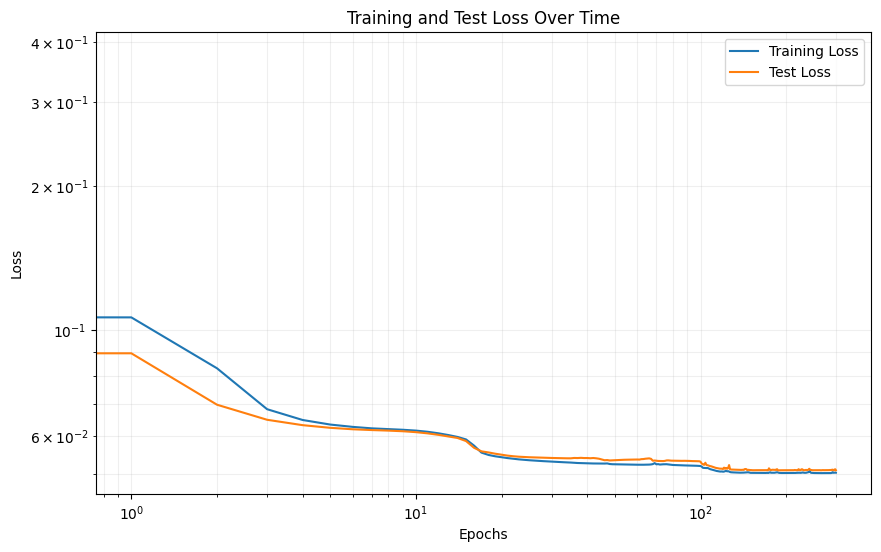

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_history[0], label='Training Loss')  # we plot training loss
plt.plot(train_history[1], label='Test Loss')  # we plot test loss
plt.yscale('log')  # we use log scale for better visualization
plt.grid(True, which="both", ls="-", alpha=0.2)  # we add grid with transparency
plt.xlabel('Epochs')  # we add x label
plt.ylabel('Loss')  # we add y label
plt.title('Training and Test Loss Over Time')  # we add title
plt.legend()  # we add legend
plt.yscale('log')
plt.xscale('log')
plt.show()

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


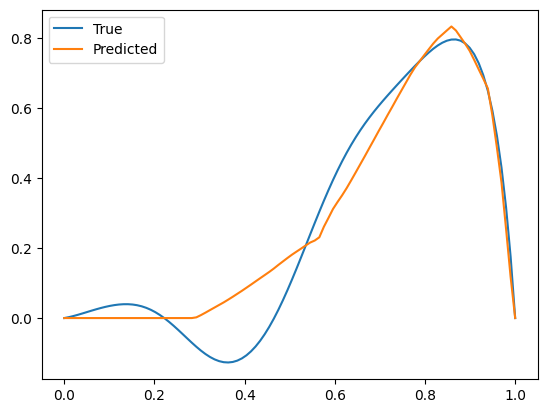

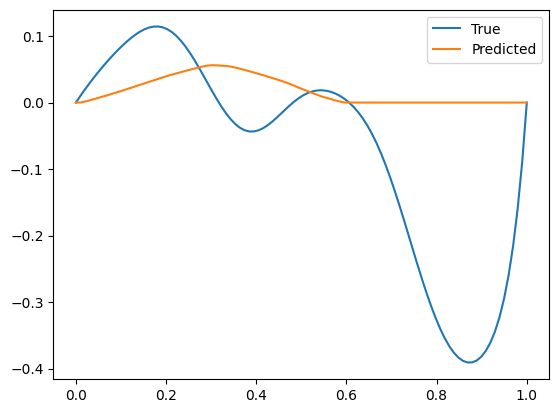

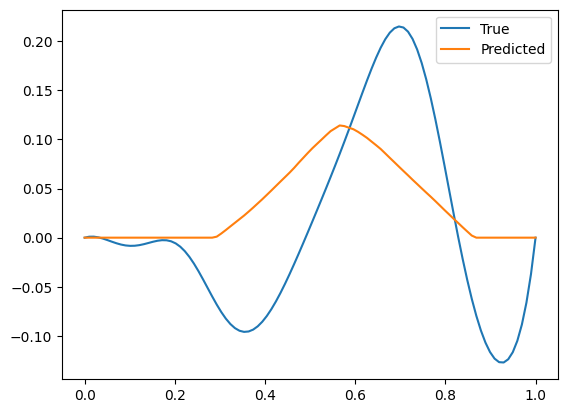

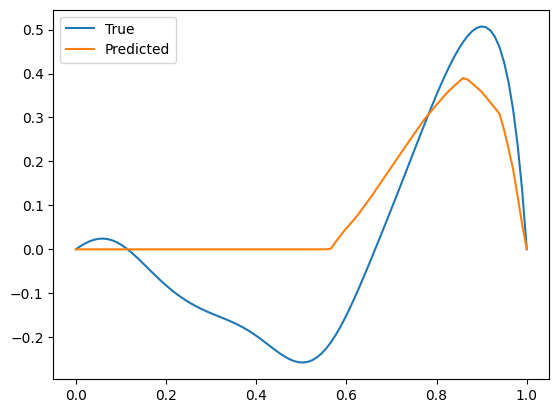

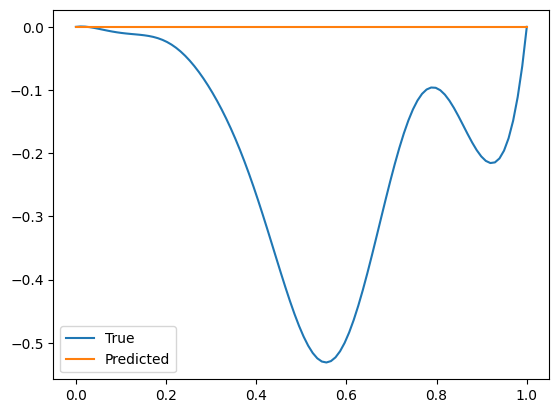

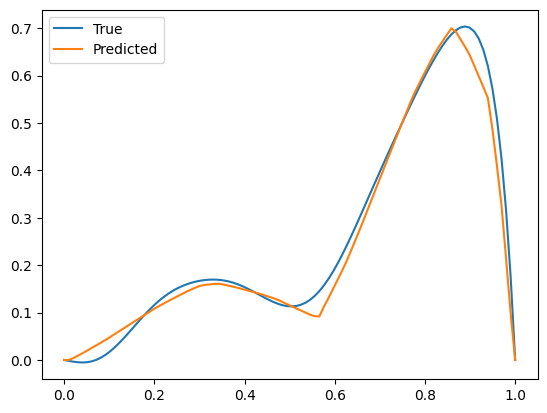

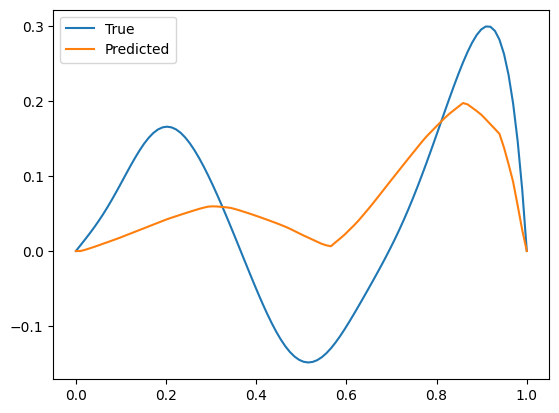

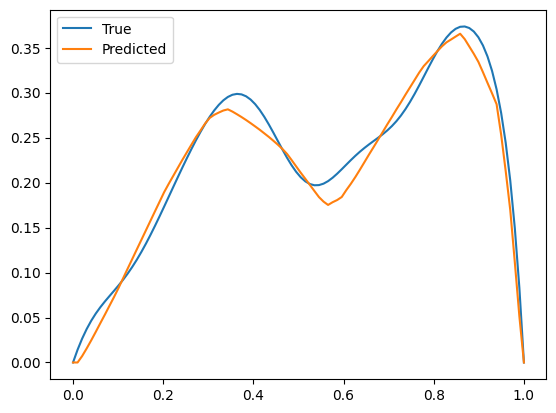

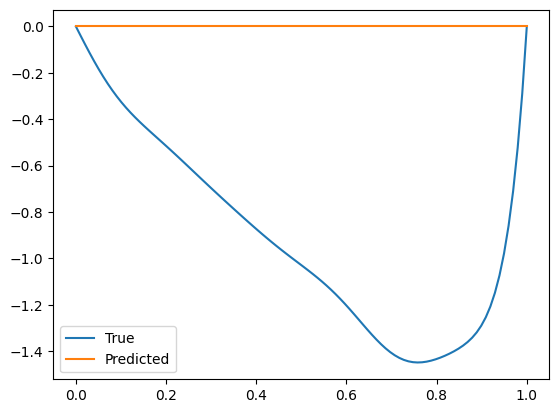

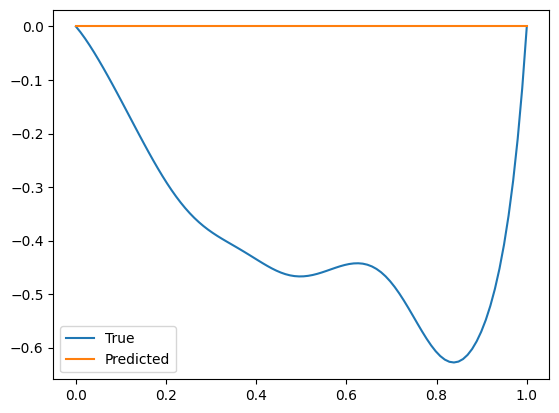

In [ ]:
# then we can test the model
mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

preds = model.predict(mu_test, xs_test)
for i in range(10):
    plt.plot(xs_test[i,:],sol_test[i,:], label='True')
    plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
    plt.legend()
    plt.show()